## About Dataset
The California Housing dataset provides information about housing prices in California, with various features that influence these prices. The dataset is structured with multiple input features that can be categorized as follows:

Features:
MedInc | Objective Feature | Median income in block group | float (USD) |
HouseAge | Objective Feature | Median age of houses in block group | float (years) |
AveRooms | Objective Feature | Average number of rooms per household | float |
AveOccup | Objective Feature | Average number of occupants per household | float |
Latitude | Objective Feature | Latitude of the block group | float (degrees) |
Longitude | Objective Feature | Longitude of the block group | float (degrees) |
Population | Objective Feature | Total population in block group | int |
MedHouseVal | Target Variable | Median house value in block group | float (USD) |

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [20]:
# Load the California Housing dataset
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)

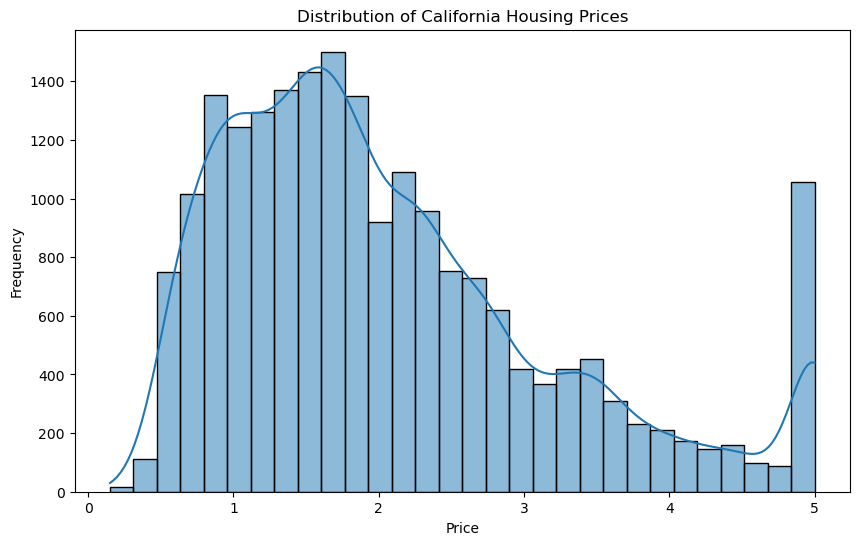

In [21]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of California Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}


In [24]:
# Train models and evaluate
r2_scores = {}

In [25]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    r2_scores[model_name] = r2
    print(f'{model_name} R² Score: {r2:.4f}')

Linear Regression R² Score: 0.5758
Decision Tree R² Score: 0.6229
Random Forest R² Score: 0.8077
Support Vector Regressor R² Score: -0.0165


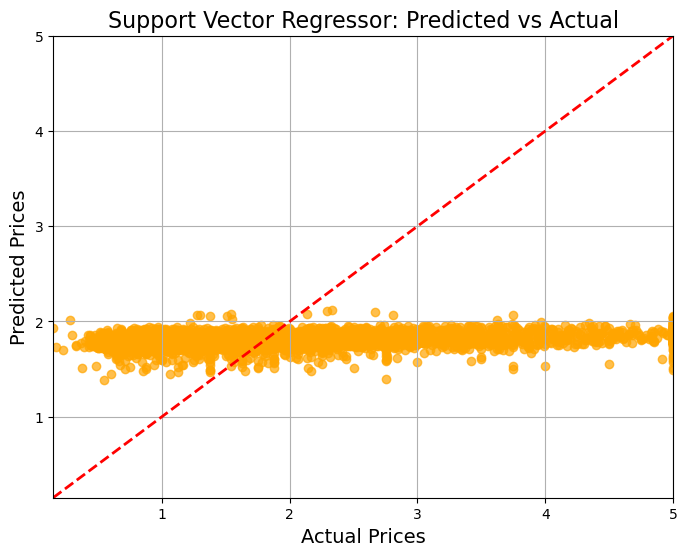

In [29]:
    # Visualization of predicted vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='orange')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.title(f'{model_name}: Predicted vs Actual', fontsize=16)
    plt.xlabel('Actual Prices', fontsize=14)
    plt.ylabel('Predicted Prices', fontsize=14)
    plt.xlim([y.min(), y.max()])
    plt.ylim([y.min(), y.max()])
    plt.grid()
    plt.show()

C:\Users\DIVYANSHI KALRA\AppData\Local\Temp\ipykernel_12700\1258532725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette='viridis')


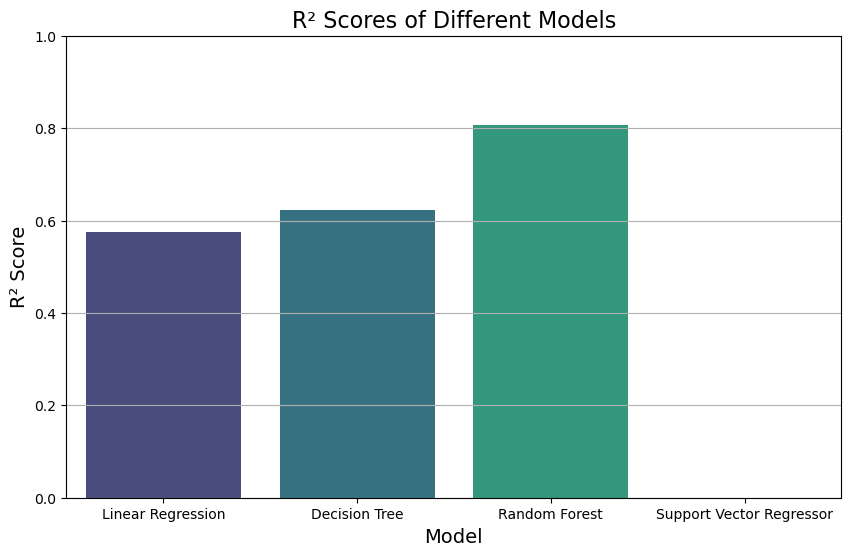

In [28]:
# Visualize R² scores for all models
plt.figure(figsize=(10, 6))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette='viridis')
plt.title('R² Scores of Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()